# **Import** Important **Libraries**

In [67]:

import urllib
import urllib.request

import numpy as np
import cv2
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
%matplotlib

Using matplotlib backend: agg


## **Paste** your **URL** Below 
### Format "URL.png" For Example-> http://answers.opencv.org/upfiles/logo_2.png


In [68]:
url = "http://www.pngall.com/wp-content/uploads/4/Marvel-Transparent.png"

## **Reading** Image from **URL**

In [69]:
req =  urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) 

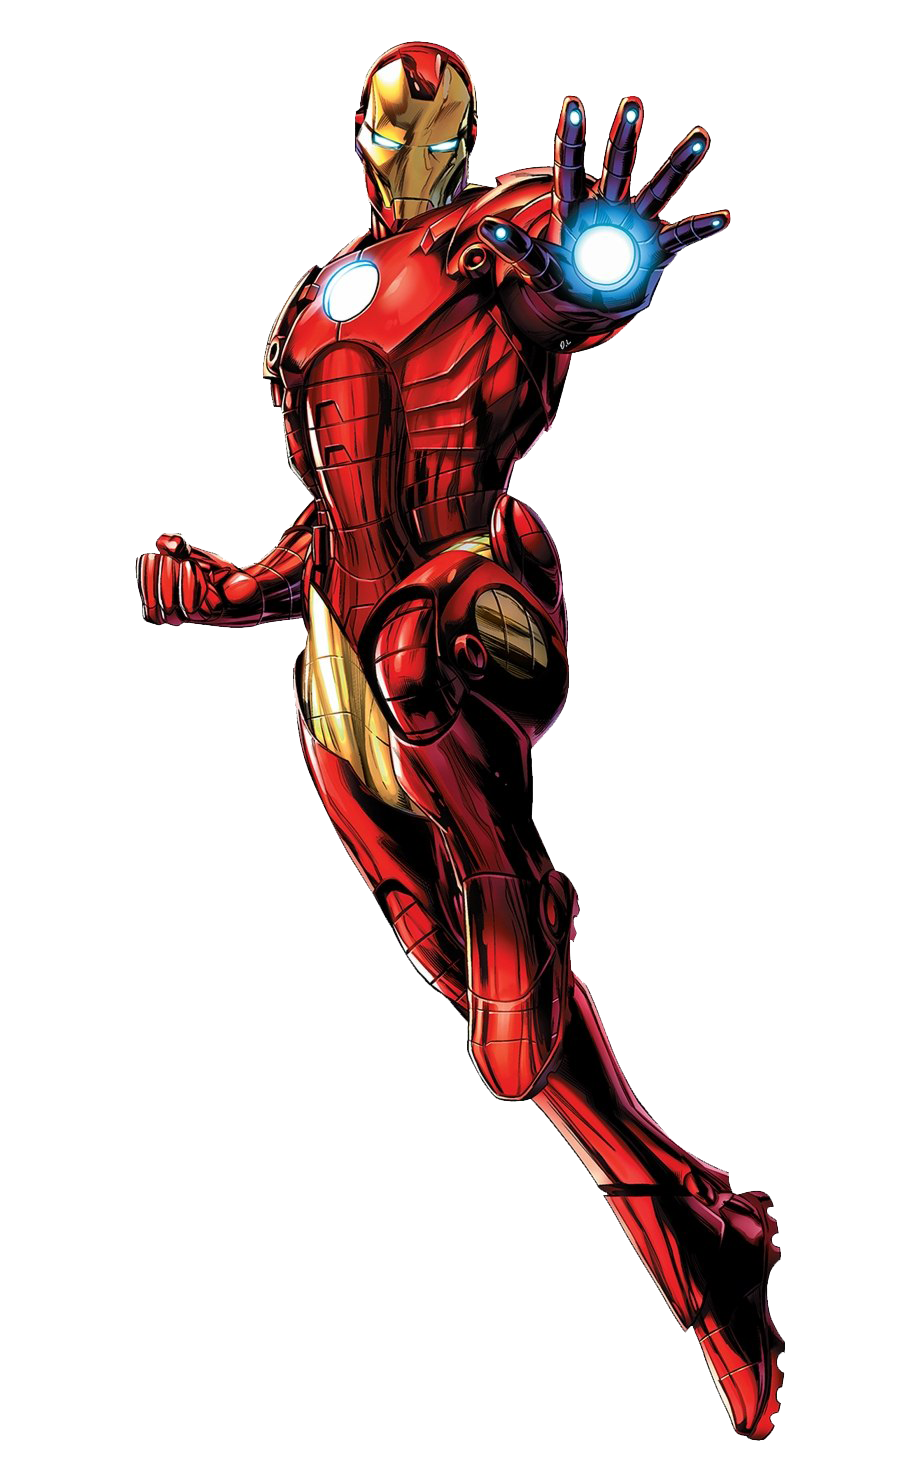

In [70]:
plt.rcParams['figure.figsize'] = [5,5]
#plt.imshow(img)
cv2_imshow(img)

# **Filters** Functions

In [71]:
def mapping_function(x, y):
   spl = UnivariateSpline(x, y)
   return spl(range(256))

In [72]:
def apply_cool(image):
  increase = mapping_function([0,64,128,192,256],[0,70,140,210,256])
  decrease = mapping_function([0,64,128,192,256],[0,40,90,150,256])
  red, green, blue = cv2.split(image)
  red = cv2.LUT(red,increase).astype(np.uint8)
  blue = cv2.LUT(red,decrease).astype(np.uint8)
  image = cv2.merge((red,green,blue))
  return image

def apply_warm(image):
  increase = mapping_function([0,64,128,192,256],[0,70,140,210,256])
  decrease = mapping_function([0,64,128,192,256],[0,40,90,150,256])
  red, green, blue = cv2.split(image)
  red = cv2.LUT(red,decrease).astype(np.uint8)
  blue = cv2.LUT(red,increase).astype(np.uint8)
  image = cv2.merge((red,green,blue))
  return image

def apply_gray(image):
 grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 return grayimage

In [73]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def choice(x,img):
  if x=='warm':
    return cv2_imshow(apply_warm(img))
    #return plt.imshow(apply_warm(img))
  if x=='cool':
    return cv2_imshow(apply_cool(img))
    #return plt.imshow(apply_cool(img))
  if x=='gray':
     return cv2_imshow(apply_gray(img)) 
  if x=='No filter':
    return cv2_imshow(img) 

# Drop-Down Filter List

In [75]:
interact(choice,x=widgets.Dropdown(options=['No filter','gray'],description='Filter'), img=fixed(img));

interactive(children=(Dropdown(description='Filter', options=('No filter', 'gray'), value='No filter'), Output…